# Total flow plot

Make a plot of total flow before and after the pandemic.

In [16]:
using Plots
using DataFrames
using StatsBase
using Printf


In [17]:
using KFactors

In [18]:
full_data = read_data("../data/peaks_merged.parquet")
data = KFactors.create_test_data(full_data, KFactors.Periods.SPRING_2022)

┌ Info: Removing sensors days with peak-hour occ above 99th percentile (22.83%)
└ @ KFactors C:\Users\mwbc\git\peak-spreading\src\computation.jl:65


,station,peak_hour_occ,peak_hour_occ_avg,peak_hour_flow,occ_entropy,occ_entropy_daytime
,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,312134,0.0742908,0.0820833,0.0736952,7.89702,7.45965
2,312346,0.079661,0.10245,0.0741977,7.90315,7.44463
3,312386,0.167777,0.2618,0.061312,7.76523,7.31581
4,312388,0.153617,0.291517,0.0584022,7.78014,7.3301
5,312420,0.151274,0.392167,0.0490514,7.7072,7.23229
6,312422,0.166968,0.291492,0.0602496,7.70133,7.2565
7,312439,0.0689397,0.0183833,0.0653954,8.07541,7.42907
8,312513,0.119383,0.2637,0.0614775,7.82866,7.37956
9,312514,0.13015,0.281483,0.0631422,7.79227,7.34773


In [19]:
# https://identity.unc.edu/brand/color-palette/
const UNC_BLUE = RGB(75/255, 156/255, 211/255)
const UNC_NAVY = RGB(19/255, 41/255, 75/255)
const UNC_DAVIE_GREEN = RGB(196/255, 214/255, 0/255)
const UNC_PINK = RGB(239/255, 68/255, 111/255)

In [20]:
# create the sensor means pre and post pandemic
sensor_mean_flow = combine(groupby(data, [:station, :period]), :total_flow => mean)
sensor_mean_flow = unstack(sensor_mean_flow, :station, :period, :total_flow_mean)
nothing

In [21]:
sensor_mean_flow.change_prepost = sensor_mean_flow.postlockdown .- sensor_mean_flow.prepandemic
sensor_mean_flow.rel_change_prepost = sensor_mean_flow.change_prepost ./ sensor_mean_flow.prepandemic .* 100
nothing

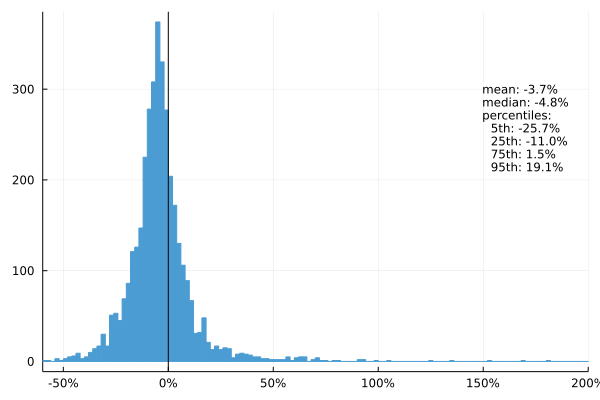

In [22]:
complete = collect(skipmissing(sensor_mean_flow.rel_change_prepost))
histogram(complete,
    xlim = (min(complete...), 200), legend=false, fill=UNC_BLUE, line=UNC_BLUE)#, xlab="Change in mean vehicles per day, pre- to post-pandemic, by sensor")
vline!([0], color=:black)
plot!(xformatter=(x -> @sprintf "%d%%" x))
annotate!(
    (150, 250, text(@sprintf("""
mean: %.1f%%
median: %.1f%%
percentiles:
  5th: %.1f%%
  25th: %.1f%%
  75th: %.1f%%
  95th: %.1f%%
            """, mean(complete), percentile(complete, [50, 5, 25, 75, 95])...), halign=:left, pointsize=8))
    )
savefig("../fig/flow_change.pdf")
plot!()